In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



In [2]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
for col in df.columns:
    if df[col].dtypes == object:
        print(df[col].value_counts())

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
Sex
Female    167805
Male      151990
Name: count, dtype: int64
AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64
Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64
Diabetic
No           

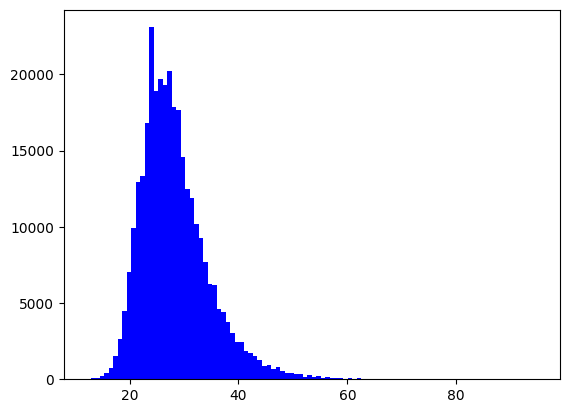

In [6]:
plt.hist(df["BMI"],bins=100,color="blue")
plt.show()

(array([2.05401e+05, 0.00000e+00, 0.00000e+00, 9.29100e+03, 0.00000e+00,
        0.00000e+00, 1.64950e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.04660e+04, 0.00000e+00, 0.00000e+00, 5.37900e+03, 0.00000e+00,
        0.00000e+00, 1.41490e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.51000e+03, 0.00000e+00, 0.00000e+00, 5.52800e+03, 0.00000e+00,
        0.00000e+00, 1.09400e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.03000e+02, 0.00000e+00, 0.00000e+00, 1.05130e+04, 0.00000e+00,
        0.00000e+00, 8.30000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        7.57000e+02, 0.00000e+00, 0.00000e+00, 1.10000e+02, 0.00000e+00,
        0.00000e+00, 2.04800e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        9.89600e+03, 0.00000e+00, 0.00000e+00, 1.52000e+02, 0.00000e+00,
        0.00000e+00, 1.28000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.11000e+02, 0.00000e+00, 0.00000e+00, 2.10000e+01, 0.00000e+00,
        0.00000e+00, 5.43100e+03, 0.00000e+00, 0.00

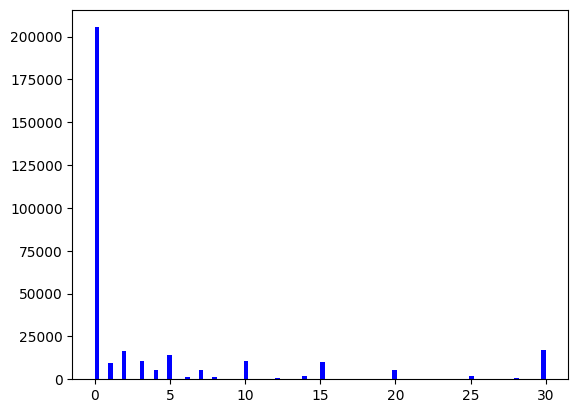

In [7]:
plt.hist(df["MentalHealth"],bins=100,color="blue")

(array([2.26589e+05, 0.00000e+00, 0.00000e+00, 1.04890e+04, 0.00000e+00,
        0.00000e+00, 1.48800e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        8.61700e+03, 0.00000e+00, 0.00000e+00, 4.46800e+03, 0.00000e+00,
        0.00000e+00, 7.60600e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.27000e+03, 0.00000e+00, 0.00000e+00, 4.62900e+03, 0.00000e+00,
        0.00000e+00, 9.24000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.80000e+02, 0.00000e+00, 0.00000e+00, 5.45300e+03, 0.00000e+00,
        0.00000e+00, 8.50000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.05000e+02, 0.00000e+00, 0.00000e+00, 9.10000e+01, 0.00000e+00,
        0.00000e+00, 2.89300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        5.01200e+03, 0.00000e+00, 0.00000e+00, 1.35000e+02, 0.00000e+00,
        0.00000e+00, 1.10000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.67000e+02, 0.00000e+00, 0.00000e+00, 3.50000e+01, 0.00000e+00,
        0.00000e+00, 3.21600e+03, 0.00000e+00, 0.00

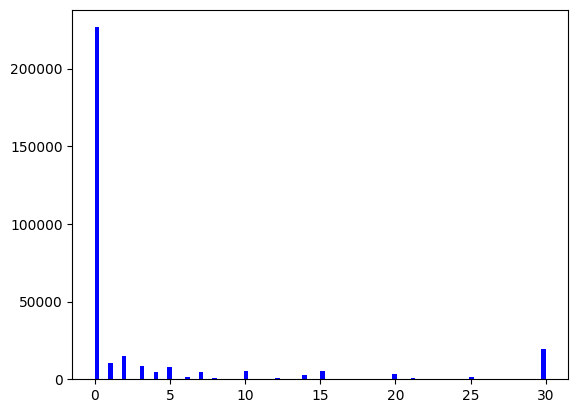

In [8]:
plt.hist(df["PhysicalHealth"],bins=100,color="blue")

(array([5.5100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.8800e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9920e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 7.7500e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.9184e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.6721e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 9.7751e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.7602e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6041e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.7960e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.1500e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.2050e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.4300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8900e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.3600e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.02

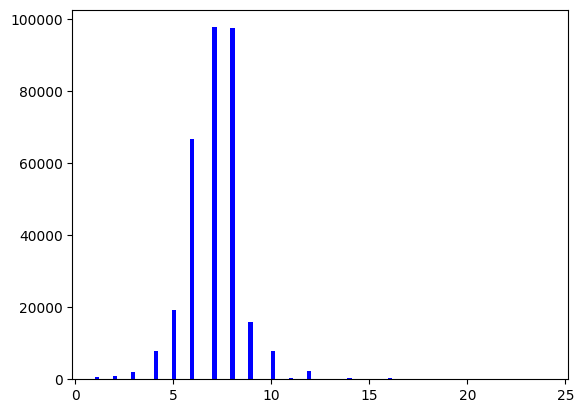

In [9]:
plt.hist(df["SleepTime"],bins=100,color="blue")

In [10]:
LE=LabelEncoder()
for col in df.columns:
    if df[col].dtypes==object :
        df[col]=LE.fit_transform(df[col])


In [11]:
X=df.drop(columns="HeartDisease")
y=df["HeartDisease"]

In [12]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [13]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int32

In [14]:
for col in X.columns:
    if X[col].dtypes==np.float64:
        ss=StandardScaler()
        X.loc[:, col] = ss.fit_transform(X[[col]]) 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
models={
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(n_neighbors=20),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=200,random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [17]:
# for name,model in models.items():
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     acc=accuracy_score(y_test,y_pred)
#     prec=precision_score(y_test,y_pred)
#     print(f"Name {name}: accuracy: {acc*100} % ,  precision: {prec*100} %")

In [18]:
best_model=LogisticRegression()
best_model.fit(x_train,y_train)
best_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
best_model.coef_

array([[ 0.0934645 ,  0.44437206, -0.27475243,  1.13636567,  0.17116997,
         0.07801441,  0.41770065,  0.74910111,  0.28290583,  0.02968793,
         0.30452776, -0.09450528, -0.02870943, -0.04957704,  0.33943882,
         0.69722689,  0.12592672]])

In [20]:
best_model.intercept_

array([-5.70799668])